In [1]:
%%bash
git clone https://github.com/ytlee3/MSE485_Final_Projects

Cloning into 'MSE485_Final_Projects'...


In [585]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.sparse import spdiags,linalg,eye
import time

def figure_adjust(x):
  for ax in plt.gcf().get_axes():
    ax.tick_params(labelsize=x,direction='in',length=8,width=3,pad=8)
    ax.spines["top"].set_linewidth(standard)
    ax.spines["bottom"].set_linewidth(standard)
    ax.spines["right"].set_linewidth(standard)
    ax.spines["left"].set_linewidth(standard)
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontname('Arial') for label in labels]
    [label.set_weight('bold') for label in labels]
standard = 2.5
font1 = {'family': 'Arial','weight': 'bold','size': 24}
font2 = {'family': 'Arial','weight': 'bold','size': 18}
font3 = {'family': 'Arial','weight': 'bold','size': 16}

np.set_printoptions(threshold =np.inf)

In [237]:
def cold_lat(N): 
    return np.ones((N,N))

In [169]:
def cal_M(lat):
    return np.abs(np.sum(s))

In [170]:
def my_neighbor_list(i, j, N):
  a = i-1
  b = j-1
  c = i+1 
  d = j+1 
  if a < 0: 
      a = N-1
  if b < 0: 
      b = N-1
  if c > N-1: 
      c = 0 
  if d > N-1: 
      d = 0
  left   = (a, j)
  above  = (i, b)
  right  = (c, j)
  below  = (i, d)
  return [left, above, right, below]

In [180]:
def cold_lat(N): 
    return np.ones((N,N))

def cal_energy(lat):
    energy = 0 
    for i in range(N): 
        for j in range(N): 
            single_spin = lat[i,j]
            nb_list = my_neighbor_list(i,j,N)
            for k in nb_list:
                energy += (- single_spin * lat[k])
    return energy/2

def mc_sweep(lat, beta, RNG):
    picks = np.random.randint(0,10000,N**2)
    check = [RNG[pick] for pick in picks]
    for i in range(N**2): 
        k, l = np.random.randint(0,N, 2)
        single_spin = lat[k,l]
        nb_list = my_neighbor_list(k, l, N)
        dE = 0
        for nb in nb_list: 
            dE += (2* single_spin * lat[nb])
        if np.exp(-beta*dE) > check[i]: 
            lat[k,l] *= -1
    return lat

In [567]:
def mc_sweep(lat, beta, RNG):
    picks = np.random.randint(0,10000,N**2)
    check = [RNG[pick] for pick in picks]
    for i in range(N**2): 
        k, l = np.random.randint(0,N, 2)
        single_spin = lat[k,l]
        nb_list = my_neighbor_list(k, l, N)
        dE = 0
        for nb in nb_list: 
            dE += (2* single_spin * lat[nb])
        if np.exp(-beta*dE) > check[i]: 
            lat[k,l] *= -1
    return lat

In [568]:

# RNG = np.loadtxt('./LCG/mi_LCG.txt')
# RNG = np.loadtxt('./LCG/Turbo_LCG.txt')
# RNG = np.loadtxt('./LCG/Unix_LCG.txt')
# RNG = np.loadtxt('./LFG/LFG.txt')
# RNG = np.loadtxt('./MRG/MRG.txt')
# RNG = np.loadtxt('./MT/MT.txt')
# RNG = np.loadtxt('./PCG/PCG.txt')
RNG = np.loadtxt('./Qrn/Qrand.txt')

In [569]:
N = 20
T = np.arange(1,4,0.1)
equ_step = 512
cal_step = 256
Cv = np.zeros(len(T)) # specific heat
E = np.zeros(len(T)) # average energy per spin

In [570]:
for i in range(len(T)): 
    lat = cold_lat(N)
    for j in range(equ_step):
        eq_lat = mc_sweep(lat, 1/T[i], RNG)
    E1, E2 = np.zeros(cal_step), np.zeros(cal_step)
    for k in range(cal_step):
        cal_lat = mc_sweep(eq_lat, 1/T[i], RNG)
        E1[k] = cal_energy(cal_lat)
        E2[k] = np.power(E1[k], 2)
    E[i] = np.mean(E1)/(N**2)
    Cv[i] = ((1/T[i])**2)*(np.mean(E2)-
        np.power(np.mean(E1),2))/(N**2)

In [571]:
Cv = Cv.tolist()

error:  2.537917506328924e-05 Critical temperature:  2.2781900000011674


<Figure size 432x288 with 0 Axes>

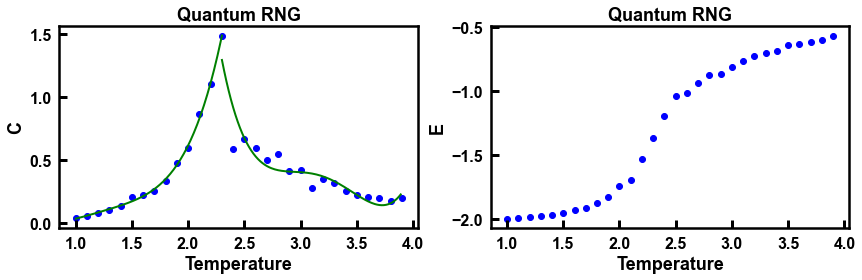

In [583]:
plt.figure(figsize=(6,4))
fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax1, ax2= axes[0], axes[1]


index = Cv.index(max(Cv))
linear_model=np.polyfit(T[:index+1],Cv[:index+1],4)
linear_model_fn=np.poly1d(linear_model)
linear_model2 = np.polyfit(T[index:],Cv[index:],4)
linear_model_fn2 = np.poly1d(linear_model2)
x_s=np.arange(1,T[index],0.01)
x_s2=np.arange(T[index],3.9,0.01)

ax1.plot(x_s,linear_model_fn(x_s),color="green", linewidth = 2)
ax1.plot(x_s2,linear_model_fn2(x_s2),color="green", linewidth = 2)
ax1.scatter(T,Cv, color ='blue')
ax2.scatter(T,E, color ='blue')
ax1.set_ylabel('C', font2)
ax2.set_ylabel('E', font2)
ax1.set_title('Quantum RNG', font2)
ax1.set_xlabel('Temperature', font2)
ax2.set_xlabel('Temperature', font2)
ax2.set_title('Quantum RNG', font2)
figure_adjust(16)
fig.tight_layout()
error = 10 
sol = 10 
for x in np.arange(2.1,2.5,0.00001): 
    y = linear_model_fn(x)
    y2 = linear_model_fn2(x)
    sub_error = np.abs(y-y2)
    if sub_error < error: 
        error = sub_error 
        sol = x 
print('error: ', error, 'Critical temperature: ', sol)